Дана статистика пользователей adult.csv.
Получите значения AUC для различных моделей и их параметров.
Используйте как минимум 3 различные модели классификации.

In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score

In [3]:
import os 
os.chdir ('E://Netology/AML/2._Линейные_модели')

In [50]:
data = pd.read_csv( 'adult.csv' )
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


age: continuous.
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: continuous.
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education-num: continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital-gain: continuous.
capital-loss: continuous.
hours-per-week: continuous.
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
class: >50K, <=50K

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [52]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
educational-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


In [53]:
# т.к. целевая переменная категориальная переведем ее в класс
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit( data['income'] )
y = pd.Series( data = le.transform( data['income'] ) )
y.head()

0    0
1    0
2    1
3    1
4    0
dtype: int32

In [54]:
columns_for_encode = ['native-country','occupation','marital-status','relationship']
for column in columns_for_encode:
    data[column + "_enc"] = le.fit_transform(data[column])

In [55]:
data = pd.get_dummies( data, columns = [ 'race' ] )
data = pd.get_dummies( data, columns = [ 'gender' ] )
data = pd.get_dummies( data, columns = [ 'education' ] )
data = pd.get_dummies( data, columns = [ 'workclass' ] )

In [56]:
X = data.drop(['native-country','occupation','marital-status','relationship','income'],axis = 1)

In [57]:
## Логистическая регрессия

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [60]:
model = LogisticRegression()

In [61]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)


In [62]:
model.score(X_test, y_test)

0.7983416931108609

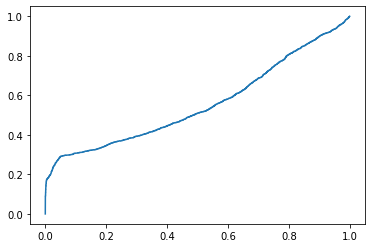

In [63]:
predictions = model.predict_proba(X_test)
fpr, tpr, thres = roc_curve( y_test, predictions[:, 1])
plt.plot( fpr, tpr )

In [64]:
roc_auc_score(y_test, predictions[:, 1])

0.5556163097977538

In [ ]:
## SVM

In [16]:
from sklearn.svm import SVC

In [17]:
model_svc = SVC(probability = True)
model_svc.fit(X_train,y_train)
y_pred = model_svc.predict(X_test)

In [18]:
model_svc.score(X_test, y_test)

0.7994677039615109

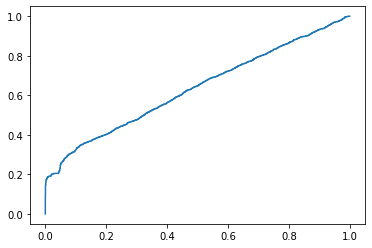

In [19]:
predictions_svc = model_svc.predict_proba(X_test)
fpr, tpr, thres = roc_curve( y_test, predictions_svc[:, 1])
plt.plot( fpr, tpr )

In [23]:
roc_auc_score(y_test, predictions_svc[:, 1])

0.632560080675147

In [65]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
model_dt = DecisionTreeClassifier(max_depth=4)
model_dt.fit(X_train,y_train)
y_pred = model_dt.predict(X_test)

In [67]:
model_dt.score(X_test, y_test)

0.8400040945849114

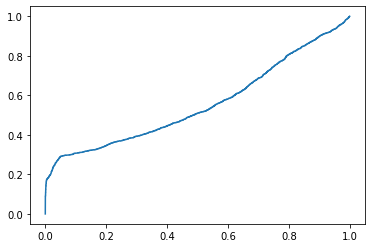

In [68]:
predictions_dt = model.predict_proba(X_test)
fpr, tpr, thres = roc_curve( y_test, predictions_dt[:, 1])
plt.plot( fpr, tpr )

In [69]:
roc_auc_score(y_test, predictions_dt[:, 1])

0.5556163097977538

In [70]:
from sklearn.neighbors import KNeighborsClassifier 

In [71]:
# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
#y_pred = knn.predict(X_test)
score_knn = knn.score(X_test,y_test)
print('The accuracy of the KNN Model is',score_knn)

The accuracy of the KNN Model is 0.7753096529839287


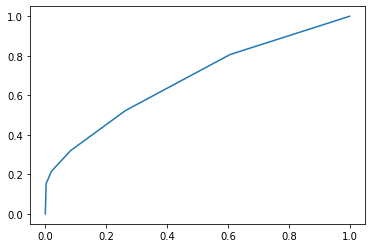

In [72]:
predictions_knn = knn.predict_proba(X_test)
fpr, tpr, thres = roc_curve( y_test, predictions_knn[:, 1])
plt.plot( fpr, tpr )

In [73]:
roc_auc_score(y_test, predictions_knn[:, 1])

0.6795422512452592